In [1]:
from peak_warming_calculator  import *
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from SALib.sample import saltelli
from SALib.analyze import sobol
import numpy as np
from numpy import genfromtxt
import matplotlib.cm as cm

In [3]:
import time

# Sensitivity Analysis

In [4]:
r_minus_g = 0.015
consumption_growth = 0.02
consumption_discount = consumption_growth + r_minus_g

In [5]:
param_list = [2, 0.00236, 300, 0.4, 2, 0.00045]

In [6]:
param_list

[2, 0.00236, 300, 0.4, 2, 0.00045]

In [7]:
import copy

In [8]:
param_list_2 = []
param_list_2.append(param_list)

for i in range(len(param_list)):
    param_list_3 = copy.deepcopy(param_list)
    param_list_3[i] = param_list[i] * 0.9
    param_list_2.append(param_list_3)
    param_list_3 = copy.deepcopy(param_list)
    param_list_3[i] = param_list_3[i] * 1.1
    param_list_2.append(param_list_3)

In [9]:
param_list_2

[[2, 0.00236, 300, 0.4, 2, 0.00045],
 [1.8, 0.00236, 300, 0.4, 2, 0.00045],
 [2.2, 0.00236, 300, 0.4, 2, 0.00045],
 [2, 0.002124, 300, 0.4, 2, 0.00045],
 [2, 0.0025960000000000002, 300, 0.4, 2, 0.00045],
 [2, 0.00236, 270.0, 0.4, 2, 0.00045],
 [2, 0.00236, 330.0, 0.4, 2, 0.00045],
 [2, 0.00236, 300, 0.36000000000000004, 2, 0.00045],
 [2, 0.00236, 300, 0.44000000000000006, 2, 0.00045],
 [2, 0.00236, 300, 0.4, 1.8, 0.00045],
 [2, 0.00236, 300, 0.4, 2.2, 0.00045],
 [2, 0.00236, 300, 0.4, 2, 0.000405],
 [2, 0.00236, 300, 0.4, 2, 0.000495]]

In [10]:
param_list

[2, 0.00236, 300, 0.4, 2, 0.00045]

In [11]:
peak_T_list = []

for i in range(len(param_list_2)):
    gamma = param_list_2[i][0]
    D0 = param_list_2[i][1]
    P_100 = param_list_2[i][2]
    P_50 = param_list_2[i][3] * P_100
    r = consumption_discount
    s = param_list_2[i][4]*r
    T_TCRE_1 = param_list_2[i][5]
    
    peak_T = peak_warming_calculator(P_50=P_50, P_100=P_100, gamma=gamma, D0=D0, consumption_growth=consumption_growth, consumption_discount=consumption_discount, s=s, r=r, T_TCRE_1=T_TCRE_1)
    peak_T_list.append(peak_T)

/Users/aaron/Documents/oxford_physics/Year_4/MPhys/drivers-of-peak-warming/peak_warming_calculator/peak_warming_calculator.py:138: RuntimeWarning: divide by zero encountered in power
  A = Am / (1 + ((P - P0) / (P_h - P0)) ** (-s / r))


In [12]:
peak_T_list

[2.5741917629221933,
 2.773085947276924,
 2.406655083384181,
 2.6416360033437645,
 2.513656997359324,
 2.5073024409707614,
 2.6351674498430393,
 2.5156023093052857,
 2.6270087904234014,
 2.5688498719836623,
 2.578469385941303,
 2.5300274479690206,
 2.610496687348429]

<BarContainer object of 13 artists>

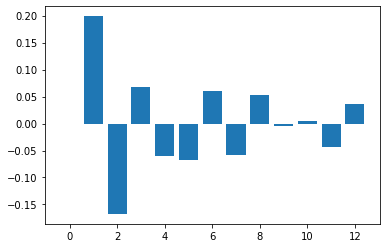

In [13]:
plt.bar(np.arange(len(peak_T_list)), peak_T_list-peak_T_list[0])

In [14]:
# for i in range(len(param_list_2)):
#     gamma = param_list_2[i][0]
#     D0 = param_list_2[i][1]
#     P_100 = param_list_2[i][2]
#     P_50 = param_list_2[i][3] * P_100
#     r = consumption_discount
#     s = param_list_2[i][4]*r
#     T_TCRE_1 = param_list_2[i][5]

In [15]:

variables = [
    'gamma',
    'D0',
    'P_100',
    'P_50/P_100',
    's/r',
    'T_TCRE_1',
]

base = peak_T_list[0]

lows = np.array([
    peak_T_list[2],
    peak_T_list[4],
    peak_T_list[5],
    peak_T_list[7],
    peak_T_list[9],
    peak_T_list[11],
])

values = np.array([
    peak_T_list[1]-peak_T_list[2],
    peak_T_list[3]-peak_T_list[4],
    peak_T_list[6]-peak_T_list[5],
    peak_T_list[8]-peak_T_list[7],
    peak_T_list[10]-peak_T_list[9],
    peak_T_list[12]-peak_T_list[11],
])



In [16]:
values

array([0.36643086, 0.12797901, 0.12786501, 0.11140648, 0.00961951,
       0.08046924])

In [17]:
lows

array([2.40665508, 2.513657  , 2.50730244, 2.51560231, 2.56884987,
       2.53002745])

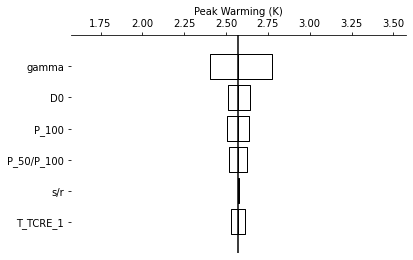

In [27]:
fig = plt.figure()

###############################################################################
# The actual drawing part

# The y position for each variable
ys = range(len(values))[::-1]  # top to bottom

# Plot the bars, one by one
for y, low, value in zip(ys, lows, values):
    # The width of the 'low' and 'high' pieces
    low_width = base - low
    high_width = low + value - base

    # Each bar is a "broken" horizontal bar chart
    plt.broken_barh(
        [(low, low_width), (base, high_width)],
        (y - 0.4, 0.8),
        facecolors=['white', 'white'],  # Try different colors if you like
        edgecolors=['black', 'black'],
        linewidth=1,
    )

    # Display the value as text. It should be positioned in the center of
    # the 'high' bar, except if there isn't any room there, then it should be
    # next to bar instead.
#     x = base + high_width / 2
#     if x <= base + 50:
#         x = base + high_width + 50
#     plt.text(x, y, str(value), va='center', ha='center')

# Draw a vertical line down the middle
plt.axvline(base, color='black')

# Position the x-axis on the top, hide all the other spines (=axis lines)
axes = plt.gca()  # (gca = get current axes)
axes.spines['left'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.spines['bottom'].set_visible(False)
axes.xaxis.set_ticks_position('top')
axes.xaxis.set_label_position('top')

# Make the y-axis display the variables
plt.yticks(ys, variables)

# Set the portion of the x- and y-axes to show
plt.xlim(base - 1, base + 1)
plt.ylim(-1, len(variables))
plt.xlabel("Peak Warming (K)")

fig.savefig('paper_figures/Nordhaus_OAT_sensitivity.png', bbox_inches='tight', dpi = 300)

In [19]:
values

array([0.36643086, 0.12797901, 0.12786501, 0.11140648, 0.00961951,
       0.08046924])

In [20]:
lows

array([2.40665508, 2.513657  , 2.50730244, 2.51560231, 2.56884987,
       2.53002745])

In [21]:
base

2.5741917629221933